### Principle Component Analysis
----
#### [Aim]
##### 1. dimensionality reduction
##### 2. hierarchial clustering

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./data/TPM.csv"
    , "adopted_comp": 15
    , "CMsize": (5, 5)
    , "CMfontsize": 1.5
    , "CMrotation": (90, 0)
    , "CMcolor": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "CMsc": None
    , "CMdendrosize": (0.3, 0.3)
    , "CMcbarpos": (1.05, 0.15, 0.05, 0.7) 
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0)

In [4]:
# Shape Data
data = np.log2(rawdata+1).T
data.index.name=None

----
### 1. Dimensionality Reduction
----
#### [Method]
##### 1-1) PCA
##### 1-2) Adopt/ignore some PCAs determining with cumculated contribution

In [5]:
# PCA
model = PCA(random_state=0)
model.fit(data)
Rdata = pd.DataFrame(model.transform(data), index=data.index, columns=[f"PCA{i}"for i in range(1, len(data)+1)])

In [6]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PCA_{i}" for i in range(1, len(data)+1)]
).T
cont.to_csv("./table/contribution.csv", index=True)
cont

,contribution [%],cumulative contribution [%]
PCA_1,54.24,54.24
PCA_2,8.53,62.77
PCA_3,4.65,67.42
PCA_4,3.54,70.95
PCA_5,3.22,74.18
PCA_6,2.75,76.93
PCA_7,2.48,79.41
PCA_8,2.39,81.81
PCA_9,2.31,84.12
PCA_10,2.28,86.40


In [7]:
# Save Data as csv.
Pdata = pd.DataFrame(model.transform(data)[:, :CONFIG["adopted_comp"]]
                       , columns=[f"PCA{i}"for i in range(1, CONFIG["adopted_comp"]+1)]
                       , index=data.index
                      )
Pdata.to_csv(f"./table/PCA_data_n={CONFIG['adopted_comp']}.csv", index=True)

----
### 2. Hierarchial Clustering
----
#### [Method]
##### 2-1) Correlation
##### 2-2) Cluster Map

In [8]:
# Correlation
cor = Pdata.T.corr()

<Figure size 360x360 with 0 Axes>

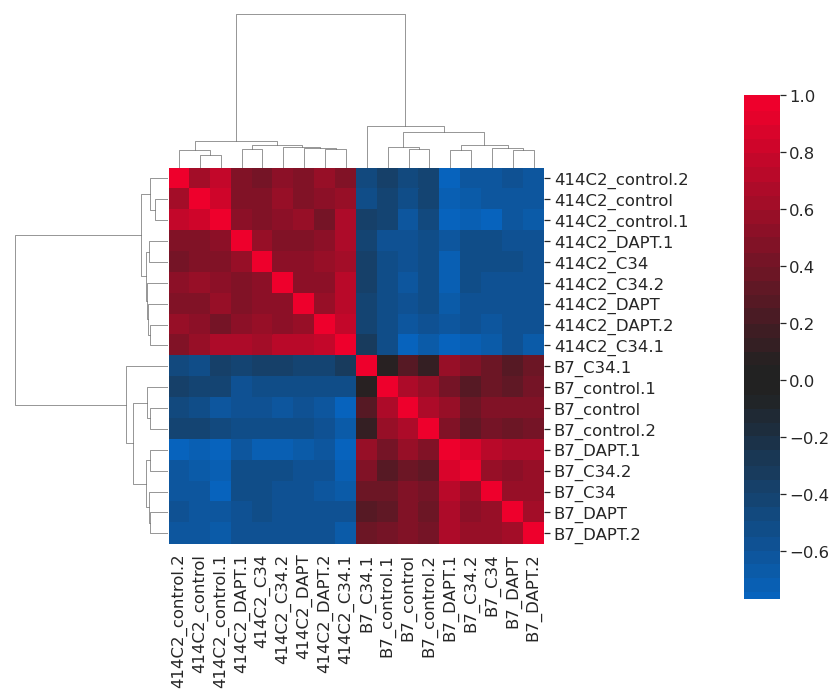

In [9]:
# Cluster Map
plt.figure(figsize=CONFIG["CMsize"])
sns.set(font_scale=CONFIG["CMfontsize"])
CM = sns.clustermap(cor
               , cmap=CONFIG["CMcolor"]
               , robust=True
               , center=cor.mean().mean()
               , row_colors=CONFIG["CMsc"]
               , col_colors=CONFIG["CMsc"]
               , dendrogram_ratio=CONFIG["CMdendrosize"]
               , cbar_pos=CONFIG["CMcbarpos"]
              )
plt.setp(CM.ax_heatmap.get_xticklabels(), rotation=CONFIG["CMrotation"][0])
plt.setp(CM.ax_heatmap.get_yticklabels(), rotation=CONFIG["CMrotation"][1])
plt.savefig(f"./figure/PCA_ClusterMap_n={CONFIG['adopted_comp']}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)